<a href="https://colab.research.google.com/github/thamonS/bcs_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import data

In [73]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import os
os.chdir('/content/drive/MyDrive/bsc_dpdm24/data')

!pwd # เช็ค path ที่กำลังทำงานอยู่
apndx_data = pd.read_csv("/content/drive/MyDrive/bsc_dpdm24/data/apndx.csv")

/content/drive/MyDrive/bsc_dpdm24/data


In [75]:
apndx_data.shape

(260000, 25)

In [76]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [77]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [78]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,NaN
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,NaN
259998,NaN


In [79]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna =('No')

In [80]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,No,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,No,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,No,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,No,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,No,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [81]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna =('No')

In [82]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

In [83]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

# สร้าง โมเดลทำนายว่าคนไข้ที่มามีโอกาสเป็น cancer มั้ย

## ลบข้อมูลที่ได้หลังจากตรวจเเล้วว่าเป็นมะเร็ง

In [84]:
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])

In [85]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,No,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,No,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,No,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,No,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## ลบข้อมูลที่ไม่น่าจะใช้สร้างโมเดลได้

In [86]:
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])

In [87]:
apndx_data.shape

(260000, 20)

##แปลง data ให้เป็นตัวเลขทั้งหมด

In [88]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  object 
 4   Alcohol_Consumption         260000 non-null  object 
 5   Family_History_Cancer       260000 non-null  object 
 6   Genetic_Mutations           260000 non-null  object 
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  object 
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  object 
 11  Previous_Cancers            260000 non-null  object 
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [89]:
Smoking_maping = {'No': 0, 'Yes': 1}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(Smoking_maping)

Alcohol_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(Alcohol_maping)

Family_maping = {'No': 0, 'Yes': 1}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(Family_maping)

Genetic_maping = {'No': 0, 'Yes': 1}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(Genetic_maping)

Physical_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(Physical_maping)

Radiation_Exposure_maping = {'No': 0, 'Yes': 1}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(Radiation_Exposure_maping)

Previous_maping = {'No': 0, 'Yes': 1}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(Previous_maping)

Tumores_maping = {'Negative': 0, 'Positive': 1}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(Tumores_maping)

Symptom_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(Symptom_maping)

In [90]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

#fit the encoder on the specified columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

#transform the data
encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

#create a  new dataframe with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))

#concatenate the encoded dataframe with the original dataframe
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)

# Drop the original columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Display the updated DataFrame
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,0,NaN,Yes,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,No,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,No,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,1.0,No,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,NaN,No,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [91]:
Previous_maping = {'No': 0, 'Yes': 1}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(Previous_maping)

# เก็บ Test เอาไว้วัดผลตอนจบ
- เช็คว่า train test กระจายตัวเท่ากันมั้ย

In [92]:
# prompt: random sampling 60000 data and also keep the rest
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)

print("Trainnig data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Trainnig data shape: (200000, 24)
Testing data shape: (60000, 24)


In [93]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Platelet_Count,Tumor_Markers,Symptom_Severity,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,...,50927,50927,17704,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,...,9073,9073,3149,9073,9073,9073,9073,9073,9073,9073


In [94]:
9073/	50927

0.17815696978027373

In [95]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Platelet_Count,Tumor_Markers,Symptom_Severity,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,...,169786,169786,59732,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,...,30214,30214,10612,30214,30214,30214,30214,30214,30214,30214


In [96]:
30214/169786

0.17795342372162604

# เลือก model ที่ดีที่สุด (Model Selection)



1.   Decision Tree
2.   Decision Tree (short)
3.   Naviive Bayes


## แบ่ง data เป็น 10 ก้อน (split data into 10 folds)

In [112]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 10, shuffle= True ,random_state=6)

In [113]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

## Decision Tree

In [114]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
# define
dt_classifier = DecisionTreeClassifier() #default
# train & evolulation (cross validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [115]:
# Print the Cross-validation scores
print("Cross-validation Accuracy:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Satndard diviation:", cv_scores.std())

Cross-validation Accuracy: [0.72135 0.7241  0.7273  0.7233  0.7241  0.72325 0.7242  0.7223  0.72775
 0.7229 ]
Mean accuracy: 0.724055
Satndard diviation: 0.001927621591495574


##(Short) Decision Tree

In [125]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5) #default
# train & evolulation (cross validation)
cv_scores = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [126]:
# Print the Cross-validation scores
print("Cross-validation Accuracy:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Satndard diviation:", cv_scores.std())

Cross-validation Accuracy: [0.8491  0.84865 0.84905 0.84875 0.849   0.8506  0.84955 0.8494  0.8453
 0.8493 ]
Mean accuracy: 0.84887
Satndard diviation: 0.001297343439494716


##Naive Byes

In [111]:
#import
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
#define
nb_classifier = GaussianNB()
#train & #evaluation scores
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py", line 266, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py", line 426, in _partial_fit
    X, y = validate_data(self, X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


#เลือก model ที่แม่นที่สุดคือ (Short) Tree มา train ด้วย all training data

In [117]:
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=5) #default
# train & evolulation (cross validation)
dt_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

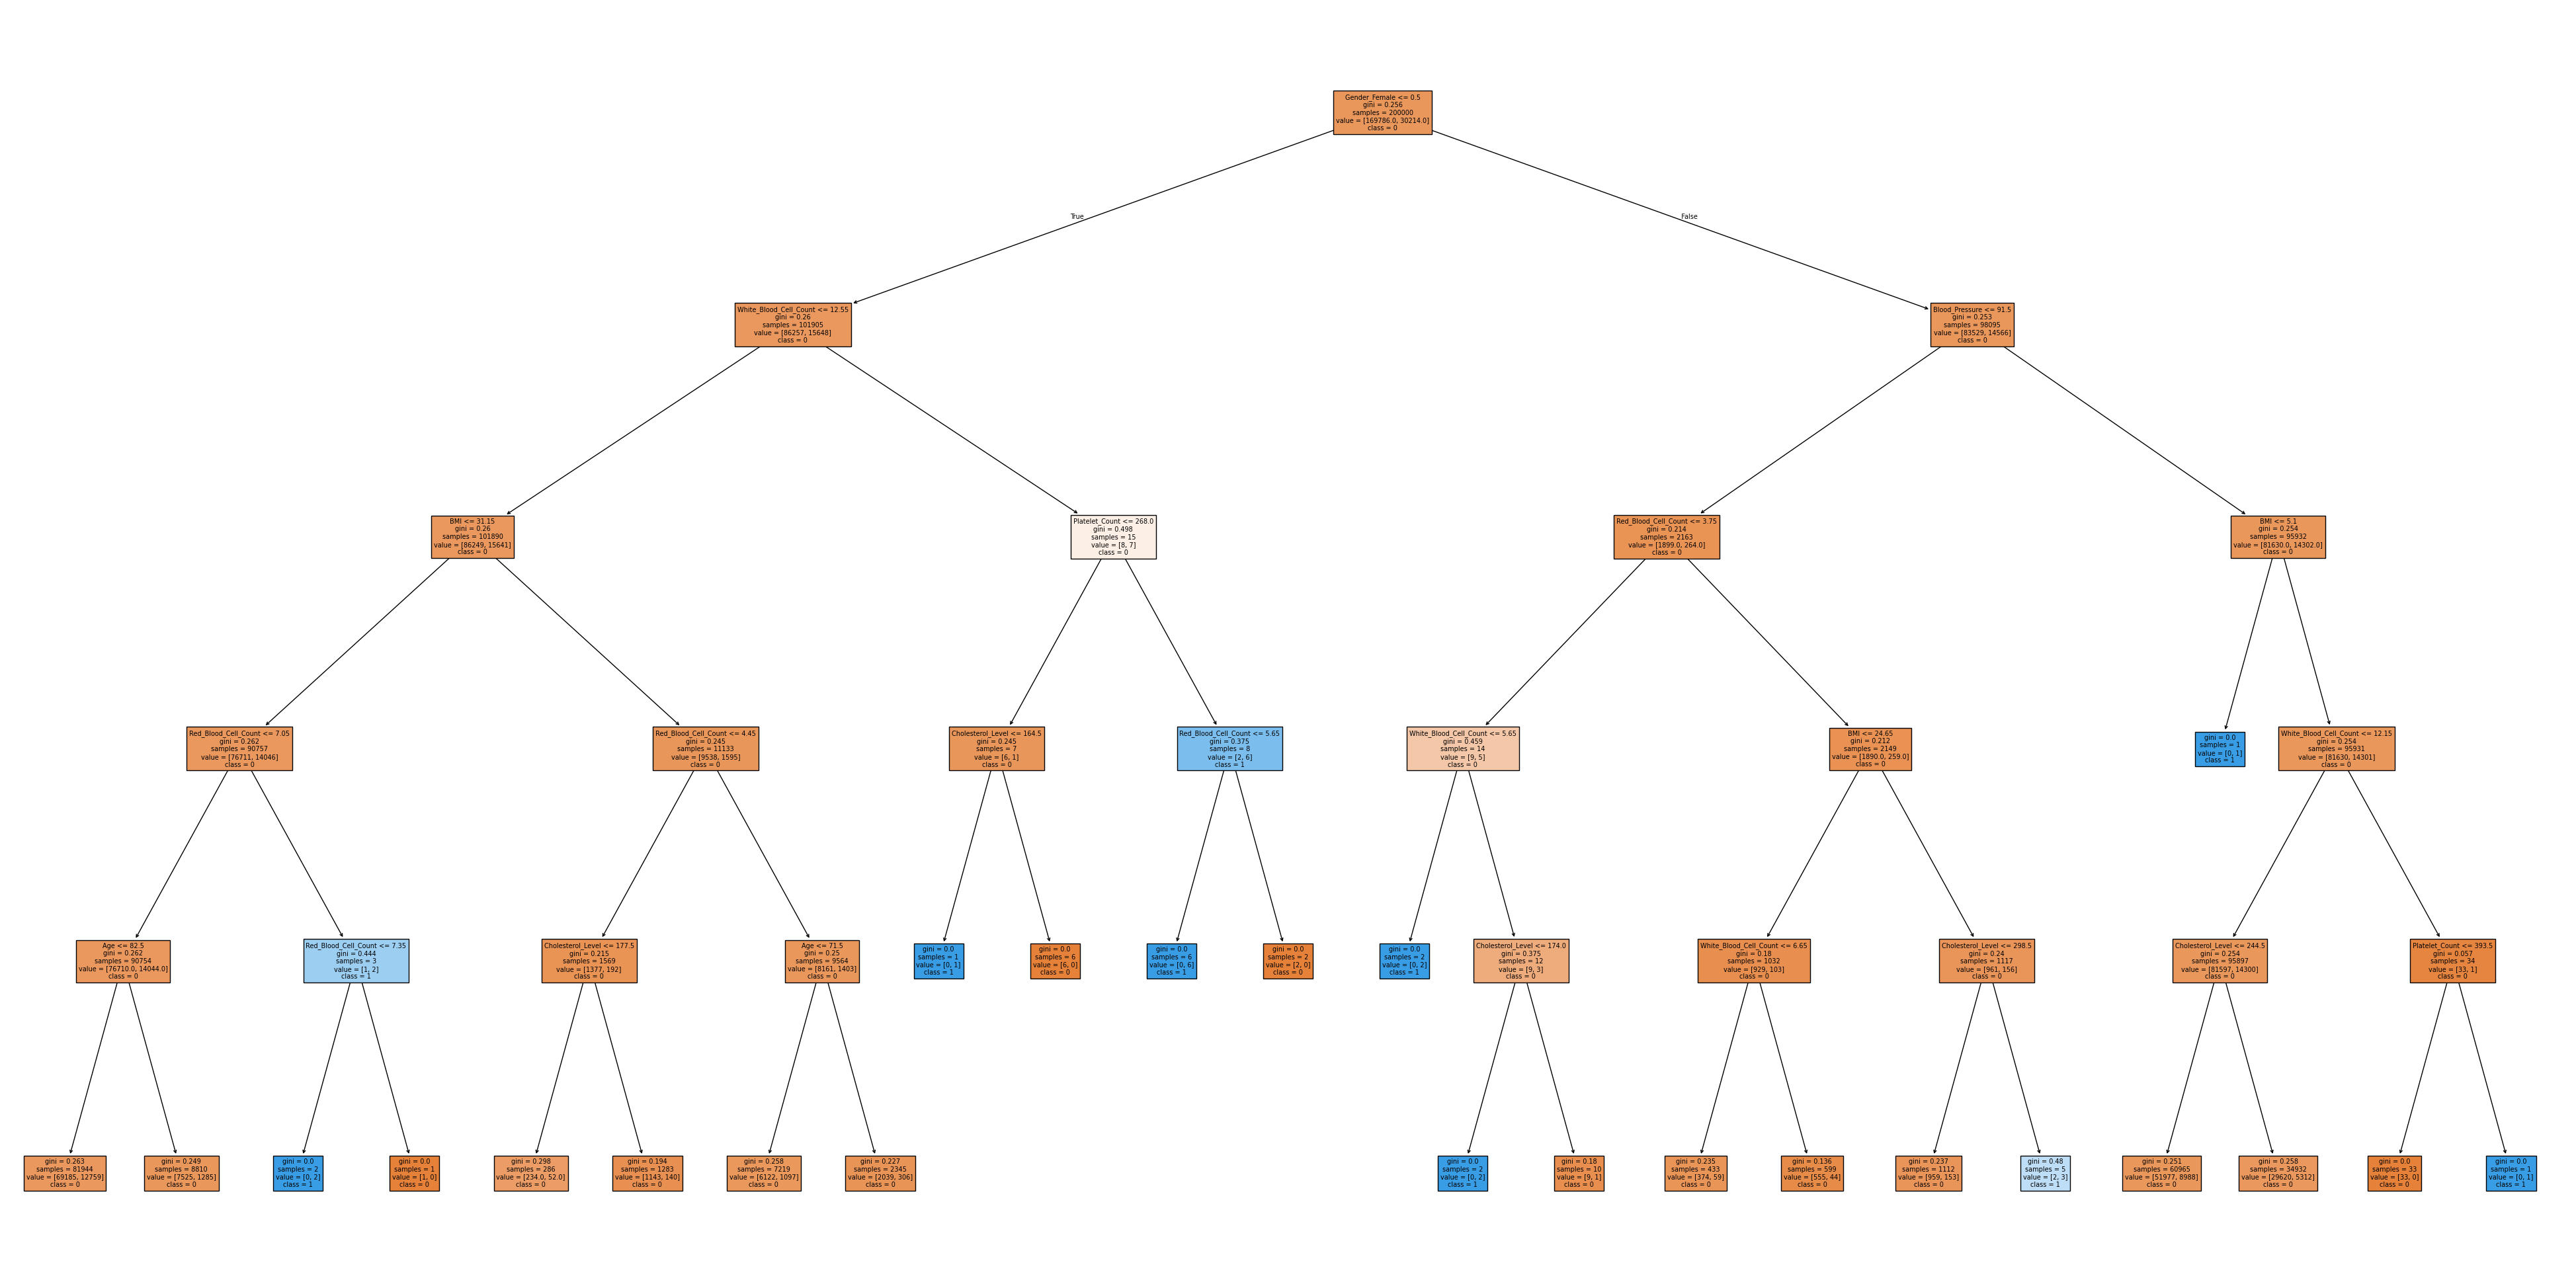

In [118]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_classifier2 is your trained DecisionTreeClassifier
plt.figure(figsize=(50,25))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

บรรทัดแรก แบ่งด้วยอะไร
gini score
sample หลุดออกมา  200000
value คือ ใน 2แสน มีคนเป็น 160000 ไม่เป็น 300000

blood pressure น้อยกว่า 91.5 มั้ย
มากกว่าไปขวา น้อยกว่าไปซ้าย

## วัดผลด้วย test data

In [119]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis = 1)
y_actual = test_data['Appendix_Cancer_Prediction']

In [120]:
# predict
y_pred = dt_classifier2.predict(X_test)

In [121]:
# evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_pred)
print(f"Accuracy on test data : {accuracy}")

Accuracy on test data : 0.8487166666666667


บรรทัดแรก แบ่งด้วยอะไร
gini score
sample หลุดออกมา  200000
value คือ ใน 2แสน มีคนเป็น 160000 ไม่เป็น 300000

blood pressure น้อยกว่า 91.5 มั้ย
มากกว่าไปขวา น้อยกว่าไปซ้าย

#Quiz 12
หาต้นไม้ตัดสินใจที่มี avg cross-validation accuracy มากกว่า 84.89%

In [159]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier3 = DecisionTreeClassifier(max_depth=2) #default
# train & evolulation (cross validation)
cv_scores = cross_val_score(dt_classifier3, X_train, y_train, cv=kf, scoring='accuracy')

In [160]:
# Print the Cross-validation scores
print("Cross-validation Accuracy:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Satndard diviation:", cv_scores.std())

Cross-validation Accuracy: [0.8491  0.84865 0.84905 0.8488  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Mean accuracy: 0.8489199999999999
Satndard diviation: 0.0012828094168659608
